https://www.tensorflow.org/beta/tutorials/generative/dcgan

- Batch normalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
- Leaky Relu: https://keras.io/api/layers/activation_layers/leaky_relu/
- Activation functions: https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e
- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

- logit : https://deepai.org/machine-learning-glossary-and-terms/logit

- dropout : http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf

- https://intellipaat.com/community/558/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-maxpool-of-tensorflow


 CNN 

 Filter : kerner이라고 부름 
 
 Stride : kerner이 얼만큼 이동하는가

 Padding : kerner 주변에 여유공간을 둘건지 안둘건지? 

 Activation : 어떤 계산을 할건지? 

 





In [30]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# 데이터셋 다운 
# 기본 셋은 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 
# _ 를 통해 무시한다. 
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [32]:
# 형태가 다른 이유? 
# x_train에 y_train의 라벨이 들어가기 때문 
x_train.shape, type(x_train), x_train.ndim, y_train.shape, type(y_train), y_train.ndim

((60000, 28, 28), numpy.ndarray, 3, (60000,), numpy.ndarray, 1)

21967
6


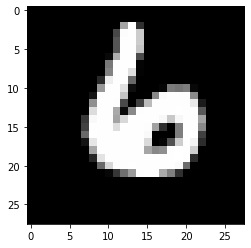

In [33]:
# 임의의 이미지 보기 
i = np.random.randint(0, 60000)
print(i)
print(y_train[i])
plt.imshow(x_train[i], cmap="gray")

In [34]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")

In [35]:
x_train.shape

(60000, 28, 28, 1)

In [36]:
# 0 ~ 255 값을 가지는 것을 확인 
x_train[0].min(), x_train[0].max()

(0.0, 255.0)

In [37]:
x_train = x_train / 255

In [38]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

## 생성자 만들기

- GAN의 핵심 

1) GENERATOR : 생성자

2) DISCRIMINATOR : 비평자

In [39]:
def build_generator():
    network = tf.keras.Sequential() 

    network.add(layers.Dense(7 * 7 * 256, use_bias = False, input_shape = (100, )))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    network.add(layers.Reshape((7, 7, 256)))

    # 7 * 7 * 128 
    network.add(layers.Conv2DTranspose(128, (5,5), padding="same", use_bias = False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 14 * 14 * 64 
    network.add(layers.Conv2DTranspose(64, (5,5), strides = (2,2), padding="same", use_bias = False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 28 * 28 * 1 
    network.add(layers.Conv2DTranspose(1, (5,5), strides = (2,2), padding="same", use_bias = False, 
    activation = "tanh"))

    network.summary()

    return network

In [40]:
generator = build_generator()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 128)        

In [41]:
# noise 생성 
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 1.5040556 ,  1.5325532 ,  0.3893163 , -0.5972618 , -0.07311076,
        -0.12450772,  0.5423023 , -1.1455292 , -0.07505214, -0.38967156,
         0.6539725 , -0.26386818,  0.24001329, -2.5406802 , -1.807544  ,
         0.14225861, -1.7035574 ,  0.30562404, -0.5198604 , -0.73737526,
        -0.58505523, -0.8126793 , -1.320811  , -0.48985496, -0.17622472,
        -0.19586986,  0.12855576, -0.71076554, -2.3508089 ,  1.6029764 ,
         0.0870326 , -1.034744  ,  1.2304409 , -2.0036304 ,  0.89666206,
         0.6617613 ,  0.16773641,  0.33149153,  1.663062  ,  0.15019791,
        -1.5757737 , -0.77668774, -1.2699485 ,  1.2254776 ,  1.3034512 ,
         0.19984502,  0.45646143, -0.825805  ,  0.35566235, -1.3045723 ,
        -0.98371905, -0.759607  , -0.1267693 , -0.9622043 , -1.3361131 ,
         1.548852  , -0.05674981,  0.3883766 ,  0.22106917,  0.9226117 ,
        -2.7701185 , -1.6886976 ,  0.26555568, -0.27926886, -2.5279515 ,
 

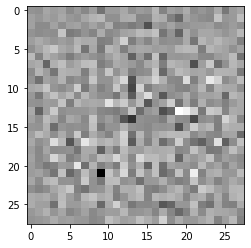

In [42]:
# 무언가 전달하면 이미지를 만든다

generated_image = generator(noise, training = False)
generated_image.shape
plt.imshow(generated_image[0, :, :, 0], cmap = "gray")

### 비평자 만들기 

In [43]:
def build_discriminator():
    network = tf.keras.Sequential() 

    # 14 * 14 * 64 
    network.add(layers.Conv2D(64, (5,5), strides = (2,2), padding="same", input_shape = [28,28,1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # 7 * 7 * 128
    network.add(layers.Conv2D(128, (5,5), strides = (2,2), padding="same" ))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()

    return network

In [44]:
discriminator = build_discriminator()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [45]:
discriminator(generated_image, training = False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00158073]], dtype=float32)>

In [46]:
# loss 계산 
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [47]:
def discriminator_loss(expected_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [48]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [49]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [50]:
epochs = 100
noise_dim = 100
num_images_to_generate = 16
batch_size = 256

In [51]:
@tf.function
def train_steps(images):
    noise = tf.random.normal([batch_size, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training = True)
        
        # 원래 이미지로 만든 예상되는 아웃풋 
        expected_output = discriminator(images, training =True)
        # 노이즈로 만든 검사하기 위한 아웃풋 
        fake_output = discriminator(generated_images, training = True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients( zip(gradients_of_generator, generator.trainable_variables) )
    discriminator_optimizer.apply_gradients( zip(gradients_of_discriminator, discriminator.trainable_variables) )

In [52]:
def train(dataset, epochs, test_images):
    for epoch in range(epochs): # 에포크 마다
        for image_batch in dataset: # 에포크의 데이터 셋의 이미지 배치 만큼 
            train_steps(image_batch)

        print("Epoch : ", epoch + 1)
        generated_images = generator(test_images, training = False)
        # 화면에 들어오게 이미지를 그린다.
        fig = plt.figure(figsize = (10, 10))
        
        for i in range(generated_images.shpae[0]): # 배치사이즈에서 하나씩 돌린다 
            plt.subplot(4, 4, i+1)
            plt.imshow(generated_images[i, :, :, 0], cmap = "gray")
            plt.axis("off") # 축 안보이게 하겠다
        plt.show() 

In [53]:
test_images = tf.random.normal([num_images_to_generate, noise_dim])

In [54]:
test_images.shape, type(test_images), test_images.ndim, test_images

(TensorShape([16, 100]),
 tensorflow.python.framework.ops.EagerTensor,
 2,
 <tf.Tensor: shape=(16, 100), dtype=float32, numpy=
 array([[ 0.11463612, -2.564992  ,  1.4802281 , ...,  0.06423759,
          0.10485248, -1.4608942 ],
        [ 0.01761886,  0.57213473, -0.7578114 , ...,  0.9218231 ,
          0.21988979,  1.8725505 ],
        [ 0.5661587 , -0.50644976,  0.32629654, ...,  0.83844835,
          0.96595144,  0.09275547],
        ...,
        [-0.42189932,  0.03435139,  0.61862665, ..., -0.992395  ,
         -0.21694648,  0.20784101],
        [ 0.09850778, -3.0340226 , -2.0520513 , ...,  0.6581855 ,
          0.81768906, -0.19470873],
        [-1.0335214 , -1.9312859 ,  0.51548755, ...,  0.9894868 ,
         -0.11413444, -0.31730494]], dtype=float32)>)

In [55]:
x_train.shape, type(x_train)

((60000, 28, 28, 1), numpy.ndarray)

In [56]:
x_train = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(256)

In [57]:
type(x_train), x_train

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 <BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>)

In [58]:
train(x_train, epochs, test_images)

KeyboardInterrupt: 